In [1]:
# Dependencies

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# API Call

fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= "b89a8705b676607c683445a983e6d21f"


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

In [3]:
int_rate_df = pd.DataFrame(fred_response["observations"])
int_rate_df.head()

,realtime_start,realtime_end,date,value
0,2023-02-05,2023-02-05,1954-07-01,0.80
1,2023-02-05,2023-02-05,1954-08-01,1.22
2,2023-02-05,2023-02-05,1954-09-01,1.07
3,2023-02-05,2023-02-05,1954-10-01,0.85
4,2023-02-05,2023-02-05,1954-11-01,0.83


In [4]:
int_rate_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]
# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")
int_rate_df

,date,value
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


In [5]:
# API Call for Consumer Price Index (CPI)
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'CPIAUCSL'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

In [6]:
cpi_df = pd.DataFrame(fred_response["observations"])
cpi_df.head()

,realtime_start,realtime_end,date,value
0,2023-02-05,2023-02-05,1947-01-01,21.48
1,2023-02-05,2023-02-05,1947-02-01,21.62
2,2023-02-05,2023-02-05,1947-03-01,22.0
3,2023-02-05,2023-02-05,1947-04-01,22.0
4,2023-02-05,2023-02-05,1947-05-01,21.95


In [7]:
# CPI Data frame
cpi_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
cpi_df = cpi_df[["date", "value"]]

# Write To CSV
cpi_df.to_csv("output_data/cpi_rate.csv")

# Display
cpi_df

,date,value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.0
3,1947-04-01,22.0
4,1947-05-01,21.95
...,...,...
907,2022-08-01,295.620
908,2022-09-01,296.761
909,2022-10-01,298.062
910,2022-11-01,298.349


In [8]:
# Merge Intrest Rate and CPI

mer_int_cpi_df = pd.merge(int_rate_df, cpi_df, on='date')
mer_int_cpi_df = mer_int_cpi_df.rename(columns={"value_x": "Interest Rate", "value_y": "CPI"})



# Write to CSV
mer_int_cpi_df.to_csv("output_data/merged_int_unemp_gdp_df.csv")

#Display
mer_int_cpi_df

,date,Interest Rate,CPI
0,1954-07-01,0.80,26.86
1,1954-08-01,1.22,26.85
2,1954-09-01,1.07,26.81
3,1954-10-01,0.85,26.72
4,1954-11-01,0.83,26.78
...,...,...,...
817,2022-08-01,2.33,295.620
818,2022-09-01,2.56,296.761
819,2022-10-01,3.08,298.062
820,2022-11-01,3.78,298.349


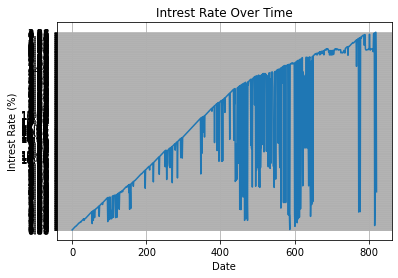

In [9]:
x_axis = mer_int_cpi_df["date"]
y_axis = mer_int_cpi_df["Interest Rate"]

plt.title("Intrest Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Intrest Rate (%)")

plt.grid()

plt.savefig("output_data/Fig1.png")

plt.plot(y_axis)
plt.show()

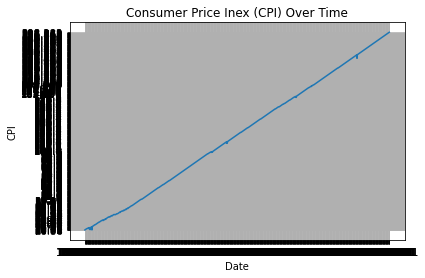

In [10]:
x_axis = mer_int_cpi_df["date"]
y_axis = mer_int_cpi_df["CPI"]

plt.title("Consumer Price Inex (CPI) Over Time")
plt.xlabel("Date")
plt.ylabel("CPI")

plt.grid()

plt.plot(x_axis, y_axis)

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

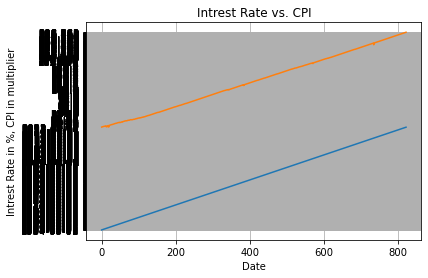

In [11]:
x_axis = mer_int_cpi_df["date"]
y_axis = mer_int_cpi_df["Interest Rate"]
y_axis = mer_int_cpi_df["CPI"]

plt.title("Intrest Rate vs. CPI")
plt.xlabel("Date")
plt.ylabel("Intrest Rate in %, CPI in multiplier")

plt.grid()

plt.plot(x_axis)
plt.plot(y_axis)

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.show()

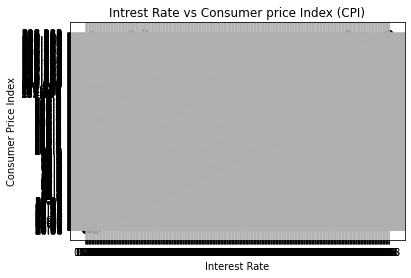

In [15]:
# Build the scatter plots for latitude vs. humidity
y_values = mer_int_cpi_df["CPI"]
x_values = mer_int_cpi_df["Interest Rate"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title('Intrest Rate vs Consumer price Index (CPI)')
plt.ylabel("Consumer Price Index")
plt.xlabel("Interest Rate")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()